In [2]:
!python3 -m pip install tensorflow

In [ ]:
import tensorflow as tf

In [2]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 2.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

from pandas.plotting import scatter_matrix 
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [132]:
dataset = pd.read_csv('brca1.csv')
dataset

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,Exon 2,Start Loss,c.1A>G,5 - Definitely pathogenic,0.990000
1,Exon 2,Start Loss,c.2T>C,5 - Definitely pathogenic,0.990000
2,Exon 2,Start Loss,c.2T>G,5 - Definitely pathogenic,0.990000
3,Exon 2,Start Loss,c.3G>C,5 - Definitely pathogenic,0.990000
4,Exon 2,Start Loss,c.3G>T,5 - Definitely pathogenic,0.990000
...,...,...,...,...,...
189,Exon 5,Missense,c.154C>T,3 - Uncertain,0.125674
190,Exon 5,Nonsense,c.160C>T,5 - Definitely pathogenic,0.990000
191,Exon 5,Deletion,c.160delC,5 - Definitely pathogenic,0.990000
192,Exon 5,Missense,c.172C>G,2 - Likely not pathogenic or of little clinica...,0.014928


In [133]:
dataset.head()

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,Exon 2,Start Loss,c.1A>G,5 - Definitely pathogenic,0.99
1,Exon 2,Start Loss,c.2T>C,5 - Definitely pathogenic,0.99
2,Exon 2,Start Loss,c.2T>G,5 - Definitely pathogenic,0.99
3,Exon 2,Start Loss,c.3G>C,5 - Definitely pathogenic,0.99
4,Exon 2,Start Loss,c.3G>T,5 - Definitely pathogenic,0.99


In [134]:
dataset.describe()

,Posterior Probability
count,194.000000
mean,0.931496
std,0.225825
min,0.000000
25%,0.990000
50%,0.990000
75%,0.990000
max,1.000000


In [135]:
print(dataset.groupby('Classification').size())

Classification
1 - Not pathogenic or of no clinical significance                 2
2 - Likely not pathogenic or of little clinical significance      7
3 - Uncertain                                                     5
4 - Likely Pathogenic                                             1
5 - Definitely pathogenic                                       179
dtype: int64


In [136]:
print(dataset.groupby('Mutation Type').size())

Mutation Type
Deletion       48
Indel           6
Insertion      23
Missense       35
Nonsense       17
Splice Site    60
Start Loss      5
dtype: int64


In [137]:
print(dataset.groupby('Posterior Probability').size())

Posterior Probability
0.000000      1
0.000800      1
0.001773      1
0.002026      1
0.002998      1
0.004114      2
0.014928      2
0.125674      2
0.635896      2
0.822263      1
0.956784      1
0.990000    159
0.993300      2
0.994000      2
0.995000      2
0.997200      2
0.998290      1
0.998400      2
0.999388      1
0.999600      2
0.999800      1
0.999964      2
1.000000      2
1.000000      1
dtype: int64


In [138]:
print(dataset.groupby('Location').size())

Location
Exon 2      47
Exon 3      39
Exon 5      44
Intron 2    20
Intron 3    33
Intron 5    11
dtype: int64


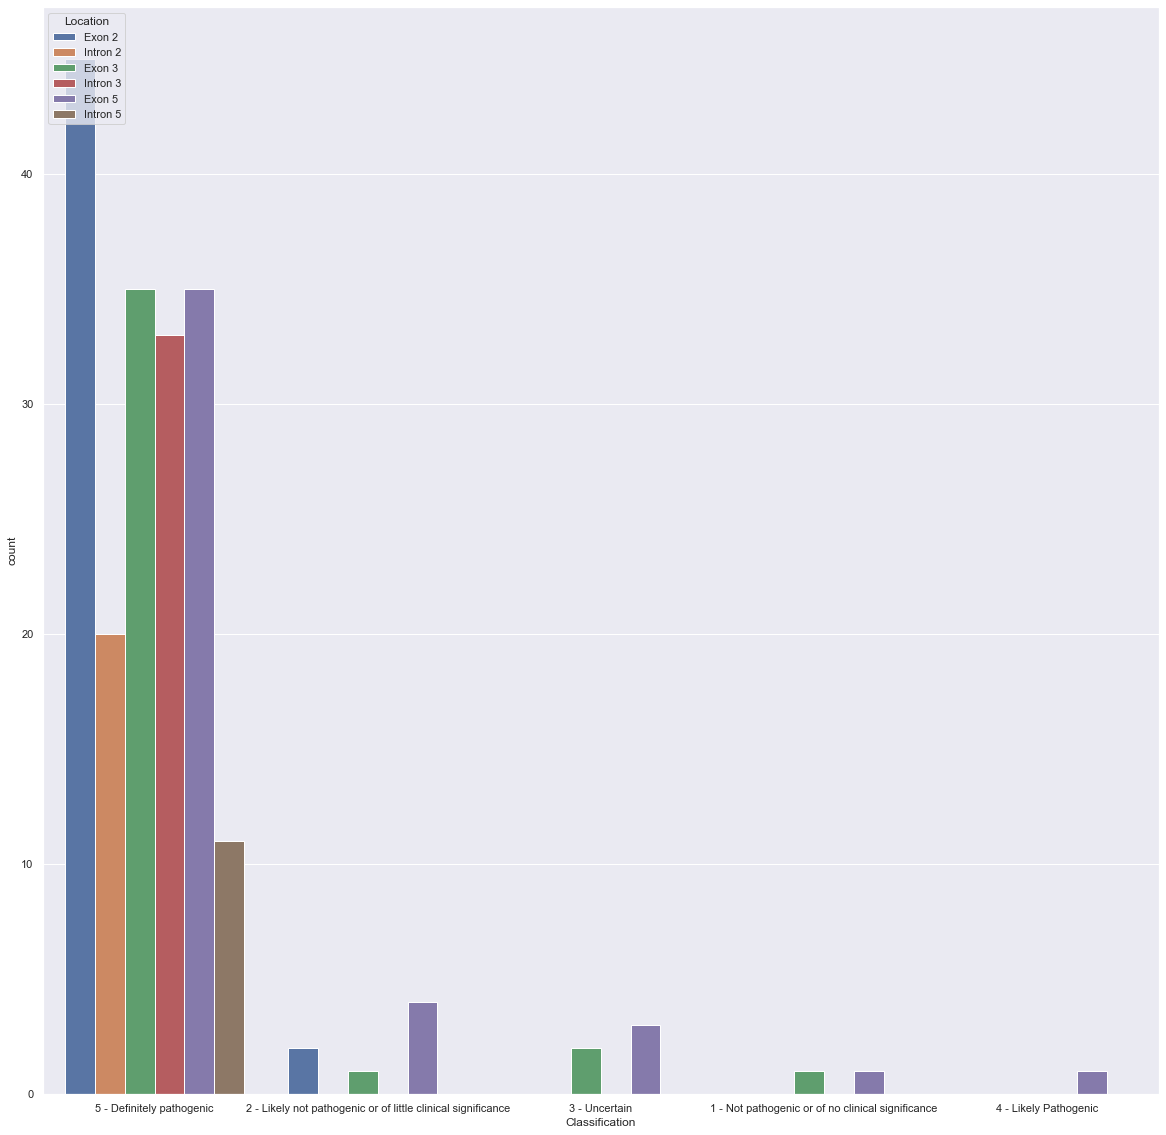

In [139]:
sns.countplot(x="Classification",hue="Location", data=dataset)
sns.set(rc={'figure.figsize':(20,20)})

In [140]:
dataset.dtypes

Location                  object
Mutation Type             object
Nucleotide Change         object
Classification            object
Posterior Probability    float64
dtype: object

In [141]:
#transforming string values to numric
def trans_location(l):
    if l=='Exon 2':
        return 2.0
    if l=='Exon 3':
        return 3.0
    if l=='Exon 5':
        return 5.0
    if l=='Intron 2':
        return 2.2
    if l=='Intron 3':
        return 3.2
    if l=='Intron 5':
        return 5.2

In [142]:
dataset['Location']=dataset['Location'].apply(trans_location)

In [143]:
dataset

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,2.0,Start Loss,c.1A>G,5 - Definitely pathogenic,0.990000
1,2.0,Start Loss,c.2T>C,5 - Definitely pathogenic,0.990000
2,2.0,Start Loss,c.2T>G,5 - Definitely pathogenic,0.990000
3,2.0,Start Loss,c.3G>C,5 - Definitely pathogenic,0.990000
4,2.0,Start Loss,c.3G>T,5 - Definitely pathogenic,0.990000
...,...,...,...,...,...
189,5.0,Missense,c.154C>T,3 - Uncertain,0.125674
190,5.0,Nonsense,c.160C>T,5 - Definitely pathogenic,0.990000
191,5.0,Deletion,c.160delC,5 - Definitely pathogenic,0.990000
192,5.0,Missense,c.172C>G,2 - Likely not pathogenic or of little clinica...,0.014928


In [144]:
dataset.dtypes

Location                 float64
Mutation Type             object
Nucleotide Change         object
Classification            object
Posterior Probability    float64
dtype: object

In [145]:
#transforming string values to numric
def trans_mutationtype(m):
    if m=='Deletion':
        return 1.0
    if m=='Insertion':
        return 2.0
    if m=='Missense':
        return 3.0
    if m=='Nonsense':
        return 4.0
    if m=='Splice Site':
        return 5.0
    if m=='Start Loss':
        return 6.0

In [146]:
dataset['Mutation Type']=dataset['Mutation Type'].apply(trans_mutationtype)

In [147]:
dataset

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,2.0,6.0,c.1A>G,5 - Definitely pathogenic,0.990000
1,2.0,6.0,c.2T>C,5 - Definitely pathogenic,0.990000
2,2.0,6.0,c.2T>G,5 - Definitely pathogenic,0.990000
3,2.0,6.0,c.3G>C,5 - Definitely pathogenic,0.990000
4,2.0,6.0,c.3G>T,5 - Definitely pathogenic,0.990000
...,...,...,...,...,...
189,5.0,3.0,c.154C>T,3 - Uncertain,0.125674
190,5.0,4.0,c.160C>T,5 - Definitely pathogenic,0.990000
191,5.0,1.0,c.160delC,5 - Definitely pathogenic,0.990000
192,5.0,3.0,c.172C>G,2 - Likely not pathogenic or of little clinica...,0.014928


In [148]:
dataset.dtypes

Location                 float64
Mutation Type            float64
Nucleotide Change         object
Classification            object
Posterior Probability    float64
dtype: object

In [149]:
#transforming string values to numric
def trans_classification(c):
    if c=='1 - Not pathogenic or of no clinical significance':
        return 1.0
    if c=='2 - Likely not pathogenic or of little clinical significance':
        return 2.0
    if c=='3 - Uncertain':
        return 3.0
    if c=='4 - Likely Pathogenic':
        return 4.0
    if c=='5 - Definitely pathogenic':
        return 5.0

In [150]:
dataset['Classification']=dataset['Classification'].apply(trans_classification)
dataset

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,2.0,6.0,c.1A>G,5.0,0.990000
1,2.0,6.0,c.2T>C,5.0,0.990000
2,2.0,6.0,c.2T>G,5.0,0.990000
3,2.0,6.0,c.3G>C,5.0,0.990000
4,2.0,6.0,c.3G>T,5.0,0.990000
...,...,...,...,...,...
189,5.0,3.0,c.154C>T,3.0,0.125674
190,5.0,4.0,c.160C>T,5.0,0.990000
191,5.0,1.0,c.160delC,5.0,0.990000
192,5.0,3.0,c.172C>G,2.0,0.014928


In [151]:
dataset.dtypes

Location                 float64
Mutation Type            float64
Nucleotide Change         object
Classification           float64
Posterior Probability    float64
dtype: object

In [152]:
#drop Nucleotide Change coloumn 
dset = dataset.drop(['Nucleotide Change'], axis=1)
dset

,Location,Mutation Type,Classification,Posterior Probability
0,2.0,6.0,5.0,0.990000
1,2.0,6.0,5.0,0.990000
2,2.0,6.0,5.0,0.990000
3,2.0,6.0,5.0,0.990000
4,2.0,6.0,5.0,0.990000
...,...,...,...,...
189,5.0,3.0,3.0,0.125674
190,5.0,4.0,5.0,0.990000
191,5.0,1.0,5.0,0.990000
192,5.0,3.0,2.0,0.014928


In [153]:
dset.dtypes

Location                 float64
Mutation Type            float64
Classification           float64
Posterior Probability    float64
dtype: object

In [ ]:
#KNN
#SVM
#Bayes